**Model 3 Fitur 1: KPR (Kredit Pemilikan Rumah) Recommendation**

The objective of this model is to recommend the most suitable KPR (Mortgage) options for users based on their financial profile. The model leverages machine learning techniques to predict affordable mortgage terms (such as down payment, tenure, and interest rate) tailored to each user’s income, savings, and housing preferences.

Using a combination of data inputs such as the user’s income, current savings, desired house price, and financial goals, the model uses Neural Networks to generate personalized mortgage recommendations. It aims to assist users in navigating the often complex mortgage application process and helps them make informed decisions when selecting a mortgage.

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Data Preprocessing

1. Data Collection
2. Feature Engineering: New features such as affordable monthly payment (based on income and savings) and loan-to-income ratio (LTI) are created to help the model predict the most accurate mortgage options.
3. Train-Test Split: The dataset is split into training and testing sets to allow for model evaluation. Typically, 80% of the data is used for training, while the remaining 20% is used to test the model’s performance.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
house= pd.DataFrame(pd.read_csv("drive/MyDrive/data_clean/house_clean_v3.csv"))
personal= pd.DataFrame(pd.read_csv("drive/MyDrive/data_clean/personal_clean.csv"))

In [ ]:
print(house.columns)
print(personal.columns)

Index(['price_in_rp', 'city', 'bedrooms', 'bathrooms', 'land_size_m2',
       'building_size_m2', 'electricity', 'maid_bedrooms', 'floors'],
      dtype='object')
Index(['tanggal', 'pendapatan', 'tabungan', 'jumlah_pokok', 'jumlah_want'], dtype='object')


In [ ]:
house.shape
print('house shape',house.shape)
personal.shape
print('personal shape',personal.shape)

house shape (3551, 9)
personal shape (4000, 5)


In [ ]:
personal_sampled = personal.sample(n=len(house), random_state=42).reset_index(drop=True)

In [ ]:
df = pd.concat([house, personal_sampled], axis=1)

In [ ]:
df.head()

,price_in_rp,city,bedrooms,bathrooms,land_size_m2,building_size_m2,electricity,maid_bedrooms,floors,tanggal,pendapatan,tabungan,jumlah_pokok,jumlah_want
0,2.990000e+09,Bekasi,4.0,5.0,239.0,272.0,4400.0,0.0,2.0,2023-02-28,8098000,1619600,4049000,2429400
1,1.270000e+09,Bekasi,3.0,2.0,55.0,69.0,2200.0,0.0,2.0,2022-11-09,2787000,557400,1393500,836100
2,1.950000e+09,Bekasi,3.0,4.0,119.0,131.0,2200.0,1.0,2.0,2023-04-30,1317000,263400,658500,395100
3,3.300000e+09,Bekasi,3.0,4.0,180.0,174.0,3500.0,1.0,2.0,2023-06-26,5128000,1025600,2564000,1538400
4,4.500000e+09,Bekasi,4.0,4.0,328.0,196.0,3500.0,1.0,2.0,2022-04-15,5579000,1115800,2789500,1673700


In [ ]:
data = df[['price_in_rp', 'pendapatan', 'tabungan']]
print(data)

       price_in_rp  pendapatan  tabungan
0     2.990000e+09     8098000   1619600
1     1.270000e+09     2787000    557400
2     1.950000e+09     1317000    263400
3     3.300000e+09     5128000   1025600
4     4.500000e+09     5579000   1115800
...            ...         ...       ...
3546  5.880000e+08      110000     22000
3547  7.850000e+08     2561000    512200
3548  7.550000e+08     3275000    655000
3549  8.000000e+08     5191000   1038200
3550  6.550000e+08     2194000    438800

[3551 rows x 3 columns]


In [ ]:
dp_percentages = [0.10, 0.15, 0.20, 0.25]
df['DP'] = df['price_in_rp'].apply(lambda x: np.random.choice(dp_percentages) * x)

In [ ]:
tenor_years = [5, 10, 15, 20, 25]
df['Tenor'] = np.random.choice(tenor_years, size=len(df))

In [ ]:
interest_rates = [5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
df['Suku_Bunga'] = np.random.choice(interest_rates, size=len(df))

In [ ]:
# Fungsi untuk menghitung cicilan per bulan menggunakan rumus anuitas
def calculate_monthly_payment(price, dp, interest_rate, tenor_years):
    loan_amount = price - dp
    r = (interest_rate / 100) / 12
    n = tenor_years * 12
    if r == 0:
        return loan_amount / n
    return loan_amount * (r * (1 + r) ** n) / ((1 + r) ** n - 1)
df['Cicilan_Bulanan'] = df.apply(lambda row: calculate_monthly_payment(row['price_in_rp'], row['DP'], row['Suku_Bunga'], row['Tenor']), axis=1)

In [ ]:
df[['price_in_rp', 'pendapatan', 'tabungan', 'DP', 'Tenor', 'Suku_Bunga', 'Cicilan_Bulanan']].to_csv('kpr.csv', index=False)

print("Dataset telah disimpan dalam file")

Dataset telah disimpan dalam file


In [ ]:
df.head()

,price_in_rp,city,bedrooms,bathrooms,land_size_m2,building_size_m2,electricity,maid_bedrooms,floors,tanggal,pendapatan,tabungan,jumlah_pokok,jumlah_want,DP,Tenor,Suku_Bunga,Cicilan_Bulanan
0,2.990000e+09,Bekasi,4.0,5.0,239.0,272.0,4400.0,0.0,2.0,2023-02-28,8098000,1619600,4049000,2429400,4.485000e+08,5,9.0,5.275736e+07
1,1.270000e+09,Bekasi,3.0,2.0,55.0,69.0,2200.0,0.0,2.0,2022-11-09,2787000,557400,1393500,836100,1.905000e+08,15,8.0,1.031626e+07
2,1.950000e+09,Bekasi,3.0,4.0,119.0,131.0,2200.0,1.0,2.0,2023-04-30,1317000,263400,658500,395100,2.925000e+08,25,8.0,1.279285e+07
3,3.300000e+09,Bekasi,3.0,4.0,180.0,174.0,3500.0,1.0,2.0,2023-06-26,5128000,1025600,2564000,1538400,6.600000e+08,15,7.0,2.372907e+07
4,4.500000e+09,Bekasi,4.0,4.0,328.0,196.0,3500.0,1.0,2.0,2022-04-15,5579000,1115800,2789500,1673700,1.125000e+09,15,7.0,3.033545e+07


In [ ]:
X = df[['pendapatan', 'tabungan', 'price_in_rp']]
y = df[['DP', 'Tenor', 'Suku_Bunga']]

In [ ]:
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

In [ ]:
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

In [ ]:
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')
print("Scaler telah disimpan.")

Scaler telah disimpan.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Model Architecture & Model Training

The model is designed to predict three key mortgage parameters: Down Payment (DP), Loan Tenure (Tenure), and Interest Rate (IR). It takes features like monthly income, savings, home price, and loan tenure as input. The model consists of an input layer, hidden layers with ReLU activation to capture complex relationships between the data, and an output layer that predicts the mortgage parameters.

Adam optimizer is used for efficient training, while Mean Squared Error (MSE) assesses the models performance. EarlyStopping is applied to stop training if validation loss does not improve after a certain number of epochs. The model is trained for up to 100 epochs with a batch size of 32, with training and validation losses plotted to monitor progress and prevent overfitting.

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(3)
])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,195 (47.64 KB)

 Trainable params: 11,811 (46.14 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.7139 - mae: 0.6337 - val_loss: 0.1804 - val_mae: 0.3168
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1836 - mae: 0.3386 - val_loss: 0.1295 - val_mae: 0.2794
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1360 - mae: 0.2972 - val_loss: 0.1115 - val_mae: 0.2694
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1210 - mae: 0.2797 - val_loss: 0.0982 - val_mae: 0.2537
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1170 - mae: 0.2759 - val_loss: 0.0975 - val_mae: 0.2435
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1061 - mae: 0.2634 - val_loss: 0.0954 - val_mae: 0.2388
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1002 - mae: 0.2545 - val_loss: 0.0959 - val_mae: 0.2401
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0995 - mae: 0.2525 - val_loss: 0.0958 - val_mae: 0.2424
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.099

# Model Evaluation

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE (Mean Absolute Error): {test_mae}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0801 - mae: 0.2158
Test Loss (MSE): 0.08051519840955734
Test MAE (Mean Absolute Error): 0.21733708679676056


In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print("Prediksi pertama (DP, Tenor, Suku Bunga):")
print(y_pred[:5])

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Prediksi pertama (DP, Tenor, Suku Bunga):
[[1.7903250e+08 1.5273912e+01 7.3944926e+00]
 [1.7462786e+08 1.5283809e+01 7.4267240e+00]
 [1.2038961e+09 1.5085130e+01 7.4961796e+00]
 [1.1855612e+09 1.5246768e+01 7.4884081e+00]
 [7.2318509e+08 1.5147090e+01 7.5124931e+00]]


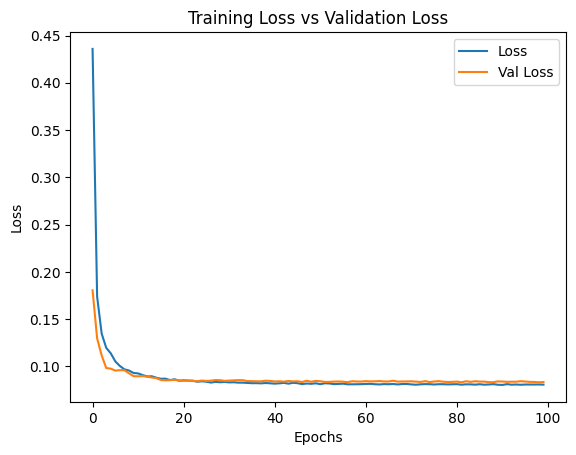

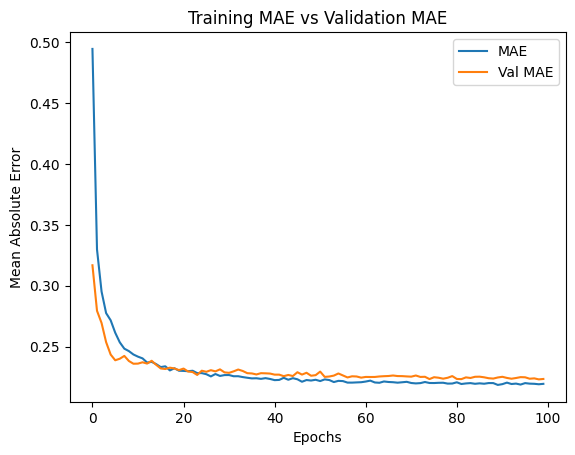

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Training MAE vs Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


# Prediction

In [ ]:
# Prediksi untuk input baru
new_data = pd.DataFrame({
    'pendapatan': [5000000],  # Pendapatan
    'tabungan': [1000000],     # Tabungan
    'price_in_rp': [2000000000]  # Harga rumah
})

# Normalisasi input baru
new_data_scaled = scaler_X.transform(new_data)

# Melakukan prediksi untuk input baru
new_prediction_scaled = model.predict(new_data_scaled)

# Mengembalikan hasil prediksi ke skala asli
new_prediction = scaler_y.inverse_transform(new_prediction_scaled)

# Membulatkan Tenor dan Suku Bunga menjadi bilangan bulat
tenor = round(new_prediction[0][1])
suku_bunga = round(new_prediction[0][2])

# Menampilkan hasil prediksi
print(f"Prediksi untuk input baru: DP: {new_prediction[0][0]}, Tenor: {tenor} Tahun , Suku Bunga: {suku_bunga}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediksi untuk input baru: DP: 360521216.0, Tenor: 15 Tahun , Suku Bunga: 7%


# Save Model

In [ ]:
model.save('kpr_model.h5')
print("Model disimpan.")

Model disimpan.


In [ ]:
model.save('kpr_model.keras')
print("Model disimpan.")

Model disimpan.


In [ ]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         1.1.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.9
aiosignal                          1.3.1
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2024.12.2.0.35.34
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread           